# Fitting a Multivariate Gaussian with Bootstrap Errors

Say the assumption is that the data has a multivariate gaussian distribution. The maximum likelihood estimate of the mean and the covariance matrix can be found by calculating the sample mean and performing PCA. 

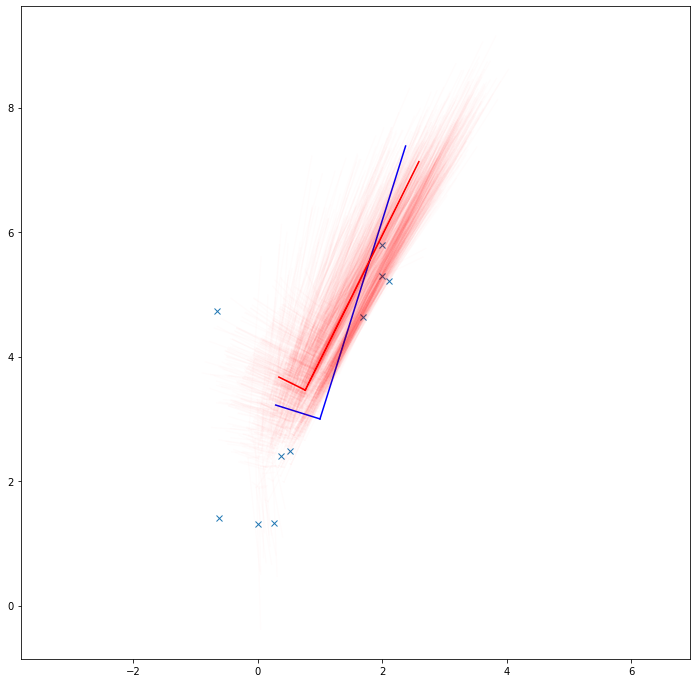

In [168]:
import numpy as np
import thucyd

def vecplot(mu,V):
    """
    utility function for plotting vectors
    """
    for v in V.T:
        x = np.array([0,v[0]]) + mu[0]
        y = np.array([0,v[1]]) + mu[1]
        plt.plot(x,y,'cyan')
    
    return None



def generate_data(N,mean,cov):
    """
    generate data with multivariate gaussian distribution
    """
    return np.random.multivariate_normal(mean, cov, N).T
    

    
def estimate_eigensystem(x,y):
    """
    estimate eigensystem by diagonalizing sample covariance matrix
    
    oriented into consistent basis
    """
    cov = np.cov(x,y)
    L,V = np.linalg.eig(cov)
    Vor, Lor, _, _,_ = thucyd.eigen.orient_eigenvectors(V,np.diag(L))
    return np.diag(Lor),Vor


def LV_plot(L,V,mean=[0,0],color='cyan',alpha=1):
    """
    utility function to plot eigensystem
    """
    for i,v in enumerate(V.T):
        x = [mean[0],L[i]*v[0]+mean[0]]
        y = [mean[1],L[i]*v[1]+mean[1]]
        plt.plot(x,y,'-',color=color,alpha=alpha)
        plt.axis('equal')
        
        
def get_bootstrap_samples(x,y,N):
    """
    generate bootstrap samples
    """
    
    x = np.array(x)
    y = np.array(y)
    size = len(x)
    for i in range(N):
        index = np.random.randint(0,size,size)
        yield x[index],y[index]
    

def get_angle(V):
    """
    get angle of eigenvector system
    """
    v = V[:,0]
    
    return np.arctan(v[1]/v[0])
    
    
    
"""
Construct ground truth dataset
"""  
N = 10

mean_true = [1,3]

M = np.array([[1,0.5],[0.3,2]])
cov_true = M.T @ M

L_true, V_true = np.linalg.eig(cov_true)
V_true, L_true, _, _, _ = thucyd.eigen.orient_eigenvectors(V_true,np.diag(L_true))
L_true = np.diag(L_true)


x,y = generate_data(N,mean_true,cov_true)



"""
Estimate eigensystem
"""


mean_mle = [np.mean(x),np.mean(y)]
L_mle,V_mle = estimate_eigensystem(x,y)


plt.figure(figsize=(12,12))
plt.plot(x, y, 'x')
LV_plot(L_true,V_true,mean_true,'blue')
LV_plot(L_mle,V_mle,mean_mle,'red')


for sample in get_bootstrap_samples(x,y,1000):
    
    x_b,y_b = sample
    mean = [np.mean(x_b),np.mean(y_b)]
    L,V = estimate_eigensystem(x_b,y_b)
    
    LV_plot(L,V,mean,'red',alpha=0.01)


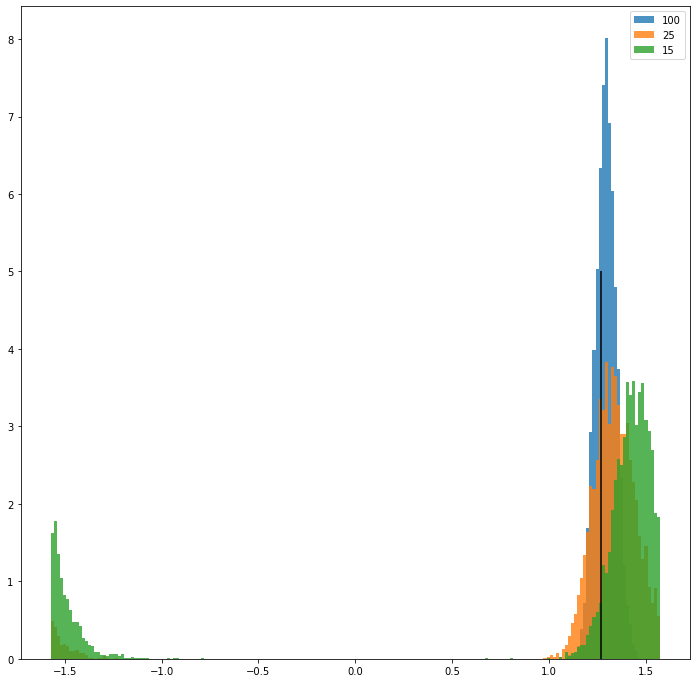

In [191]:
 """
 Eigenbasis of the covariance matrix minimizes L2 error. 
 
 Hypothesis: Eigenbasis Estimator is asymptotically normal 
 """
plt.figure(figsize=(12,12))


    
NN = [15,25,100][::-1]

x,y = generate_data(max(NN),mean_true,cov_true)
L_true, V_true = np.linalg.eig(cov_true)
V_true, L_true, _, _, _ = thucyd.eigen.orient_eigenvectors(V_true,np.diag(L_true))

for n in NN:

    angles = []

    for sample in get_bootstrap_samples(x[:n],y[:n],5000):

        x_b,y_b = sample
        mean = [np.mean(x_b),np.mean(y_b)]
        L,V = estimate_eigensystem(x_b,y_b)

        angles += [get_angle(V)]

    _ = plt.hist(angles,bins=np.linspace(-np.pi/2,np.pi/2,200),alpha=0.8,density=True)
  

plt.legend(NN)

true_angle = get_angle(V_true)
plt.vlines(x=true_angle,ymin = 0, ymax= 5)